In [ ]:
from google.colab import drive
from matplotlib.image import imread
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from skimage import color
from skimage import io
import math

#drive.mount('/content/gdrive')

In [ ]:
!unzip 'brain_tumour.zip'

In [ ]:
#os.listdir('brain_tumour') 

(348, 287)

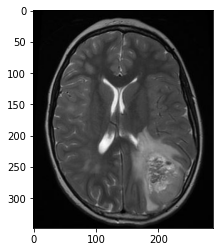

In [ ]:
Brain=imread("/content/brain_tumour/train/yes/Y100.JPG")
plt.imshow(Brain)
Brain = color.rgb2gray(io.imread("/content/brain_tumour/train/yes/Y100.JPG"))

Brain.shape

In [ ]:
Brain.max()

1.0

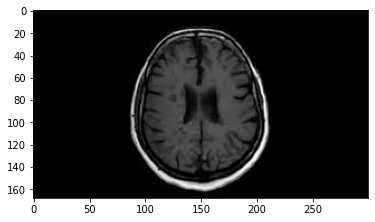

In [ ]:
no_tumour=imread('/content/brain_tumour/train/no/11 no.jpg')
plt.imshow(no_tumour,cmap='gray')

In [ ]:
dim1 = []
dim2 = []
for image_filename in os.listdir('/content/brain_tumour/train/yes'):    
    img = color.rgb2gray(io.imread('/content/brain_tumour/train/yes'+'/'+image_filename))
    d1,d2 = img.shape
    img.reshape(d1,d2,1)
    dim1.append(d1)
    dim2.append(d2)

dim1=math.floor(sum(dim1)/len(dim1))
dim2=math.floor(sum(dim2)/len(dim2))

print('average of dim1 is',dim1)
print('average of dim2 is',dim2)


image_shape=(dim1,dim2,1)

average of dim1 is 413
average of dim2 is 358


In [ ]:
image_gen=ImageDataGenerator(rotation_range=50,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1,
                             shear_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='nearest')

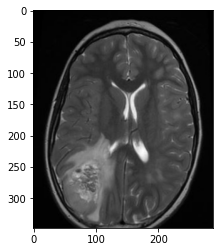

In [ ]:
plt.imshow(image_gen.random_transform(imread('/content/brain_tumour/train/yes/Y100.JPG')))

In [ ]:
train_images=image_gen.flow_from_directory('/content/brain_tumour/train', 
                                           target_size=(dim1,dim2),
                                           color_mode='grayscale',
                                           batch_size=50,
                                           class_mode='binary')

Found 229 images belonging to 2 classes.


In [ ]:
test_images=image_gen.flow_from_directory('/content/brain_tumour/test',
                                          target_size=(dim1,dim2),
                                          color_mode='grayscale',
                                          batch_size=1,
                                          class_mode='binary',
                                          shuffle=True)

Found 24 images belonging to 2 classes.


In [ ]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(dim1,dim2,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(dim1,dim2,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(dim1,dim2,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(dim1,dim2,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(dim1,dim2,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(dim1,dim2,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))





model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 10
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr
lr_scheduler = [tf.keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)]

early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.compile(loss='binary_crossentropy',optimizer='adamax',metrics=['accuracy'])

results=model.fit(train_images, epochs=50,validation_data=test_images,callbacks=[lr_scheduler])

Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
5/5 [==============================] - 29s 5s/step - loss: 2.0259 - accuracy: 0.5328 - val_loss: 0.8131 - val_accuracy: 0.5833
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
5/5 [==============================] - 29s 6s/step - loss: 0.7596 - accuracy: 0.5808 - val_loss: 0.7060 - val_accuracy: 0.4167
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
5/5 [==============================] - 28s 5s/step - loss: 0.6857 - accuracy: 0.5109 - val_loss: 0.6093 - val_accuracy: 0.6250
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0010000000474974513.
5/5 [==============================] - 28s 5s/step - loss: 0.5985 - accuracy: 0.6987 - val_loss: 0.5628 - val_accuracy: 0.7917
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0010000000474974513.
5/5 [============

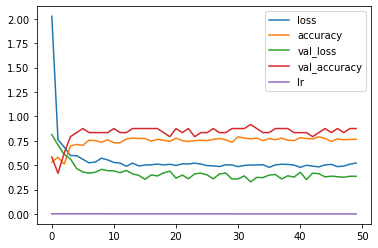

In [ ]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
model.save('brain_tumour.h5')

In [ ]:
model.evaluate(test_images)

24/24 [==============================] - 1s 43ms/step - loss: 0.4332 - accuracy: 0.8333


[0.43320050835609436, 0.8333333134651184]